In [53]:
# импорт библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.plotting import heatmap
import seaborn as sns

### Загрузка данных 

In [54]:
df=pd.read_csv('/Users/annalavrikova/Downloads/telecom/telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [55]:
# Посмотрю информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [56]:
# Кол-во штатов
df.state.nunique()

51

In [57]:
# проверю "нулевые" значения признаков
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [58]:
# значения, которые принимает international plan
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [59]:
# значения, которые принимает voice mail plan
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [60]:
# значения поля area code
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Согласно выведенной информации:
- в датафрейме нет пропущенных значений;
- в датафрейме 21 признак, 3333 значения;
- имеются 4 колонки с категориальными переменными: 'state', 'phone number', 'international plan', 'voice mail plan';
- в колонке 'state' находятся названия 51-ого штата;
- в колонке 'international plan' хранятся только 2 значения;
- в колонке 'international plan' также только 2 значения;
- в датафреме есть только 3 кода города;
- предположим, что номер телефона не влияет на отток клиента, поэтому в анализе и построении модели учитывать эту колонку не буду;
- area code имеет всего 3 значения, скорее всего стоит отнести этот признак к категориальной переменной

In [61]:
# преобразуем значения полонки в тип object
df['area code']=df['area code'].astype(object)

In [211]:
# числовые признаки
num_cols = ['account length'
           , 'number vmail messages'
           , 'total day minutes'
           , 'total day calls'
           , 'total day charge'
           , 'total eve minutes'
           , 'total eve calls'
           , 'total eve charge'
           , 'total night minutes'
           , 'total night calls'
           , 'total night charge'
           , 'total intl minutes'
           , 'total intl calls'
           , 'total intl charge'
           , 'customer service calls']

In [212]:
# категориальные признаки
cat_cols = ['state'
            , 'international plan'
            , 'voice mail plan'
            , 'area code']

In [213]:
feature_cols = num_cols + cat_cols
target_col = 'churn'

In [65]:
# проверим все ли признаки учтены (за исключением 'phone number' и 'churn')
len(feature_cols)

19

### Анализ числовых признаков

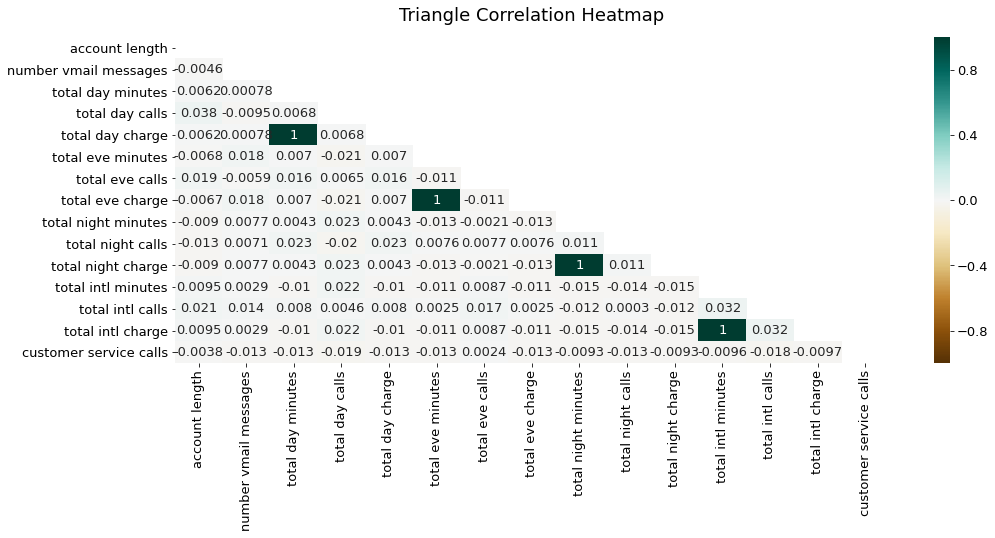

In [342]:
#Посмотрим на heat map 

plt.figure(figsize=(16, 6)) 

# Определите маску, чтобы установить значения в верхнем треугольнике на True 
mask = np.triu(np.ones_like(df[num_cols].corr(), dtype=np.bool)) 
heatmap = sns.heatmap(df[num_cols].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Согласно heat map:
- 'total eve minutes' и 'total eve charge' имеют прямую корреляцию;
- 'total day minutes' и 'total day charge' имеют прямую корреляцию;
- 'total night minutes' и 'total night charge' имеют прямую корреляцию;
- 'total intl minutes' и 'total intl charge' имеют прямую корреляцию;
- исключу один из признаков, имеющих прямую корреляцию;

#### Визуализация данных

<ipython-input-68-ce08f2c3fc13>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[num_cols].hist(ax = ax)


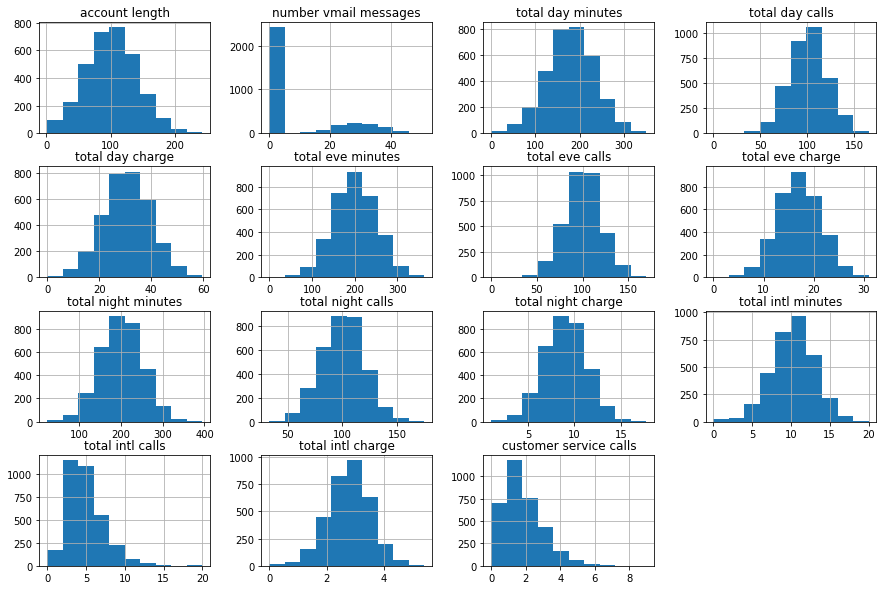

In [68]:
# построим гистограммы распределения для численных признаков
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df[num_cols].hist(ax = ax)
None

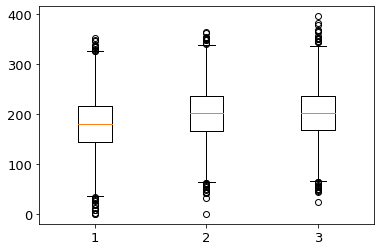

In [358]:
plt.boxplot(df[['total day minutes','total eve minutes','total night minutes']])
plt.show()

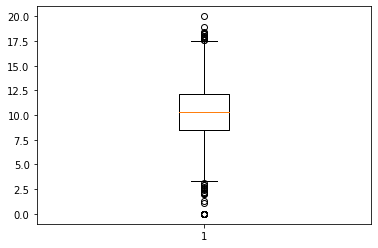

In [76]:
plt.boxplot(df['total intl minutes'])
plt.show()

Из приведенных выше гистограм видно:
- признаки 'number vmail messages', 'total intl calls', 'customer service calls' не имеют нормального распределения;

Посмотрим на среднюю продолжительность разговоров в течении периода для каждого штата

In [77]:
# период - day
day_mean_calling=df.groupby('state').agg({'total day minutes':'mean', 'total day calls':'mean', 'total day charge':\
                                         'mean'})\
.rename(columns={'total day minutes':'mean_of_total_day_minutes', 'total day calls':'mean_of_total_day_calls',\
                'total day charge':'mean_of_total_day_charge'})\
.sort_values('mean_of_total_day_minutes', ascending=False).round(0)
day_mean_calling
day_mean_calling.head()

,mean_of_total_day_minutes,mean_of_total_day_calls,mean_of_total_day_charge
state,,,
MD,197.0,99.0,34.0
IN,197.0,107.0,33.0
NJ,196.0,100.0,33.0
KS,192.0,101.0,33.0
SD,190.0,95.0,32.0


In [78]:
# период - night
night_mean_calling=df.groupby('state').agg({'total night minutes':'mean', 'total night calls':'mean',\
                                            'total night charge':'mean'})\
.rename(columns={'total night minutes':'mean_of_total_night_minutes', \
                 'total night calls':'mean_of_total_night_calls',\
                'total night charge':'mean_of_total_night_charge'})\
.sort_values('mean_of_total_night_minutes', ascending=False).round(0)
night_mean_calling.head()

,mean_of_total_night_minutes,mean_of_total_night_calls,mean_of_total_night_charge
state,,,
VA,213.0,95.0,10.0
TN,210.0,94.0,9.0
IN,210.0,102.0,9.0
MN,210.0,102.0,9.0
MO,209.0,101.0,9.0


<AxesSubplot:xlabel='state'>

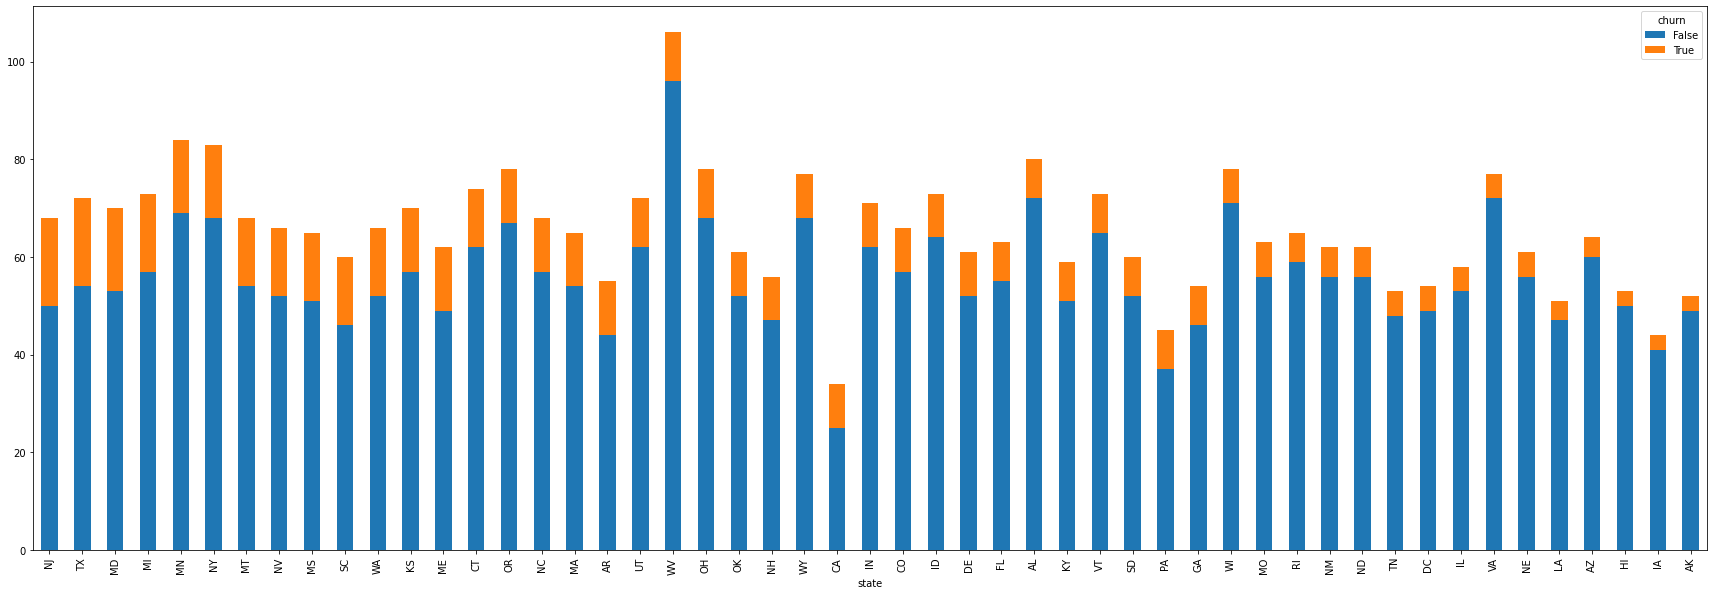

In [79]:
# посмотрим на распределение целевой переменной по штатам
df.groupby(['state', 'churn']).size().unstack().sort_values(1, ascending=False).\
plot(kind='bar', stacked=True, figsize=(30,10))

Топ 3 штатов по количеству ушедших пользователей:
- NJ  Нью-Джерси
- TX  Техас
- MD  Мэриленд

<AxesSubplot:xlabel='area code'>

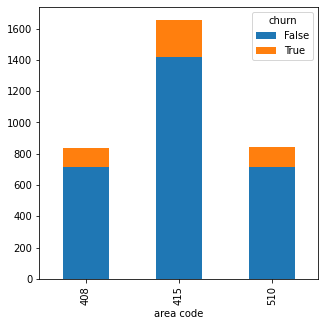

In [80]:
# посмотрим на распределение целовой переменной по area code
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

Доля ушедших клиентов в каждом 'area code' примерно одинакова. 

<AxesSubplot:xlabel='international plan'>

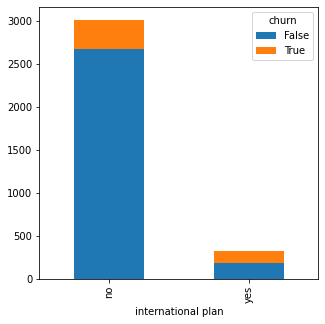

In [81]:
# посмотрим на распределение целовой переменной по international plan
df.groupby(['international plan', 'churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

Доля ушедших клиентов, у которых подключен international plan - выше.

<AxesSubplot:xlabel='voice mail plan'>

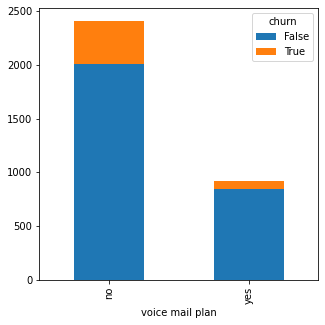

In [82]:
# посмотрим на распределение целовой переменной по voice mail plan
df.groupby(['voice mail plan', 'churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

Доля ушедших клиентов больше у тех, кто не подключает голосовые сообщения.

### Анализ категориальных переменных

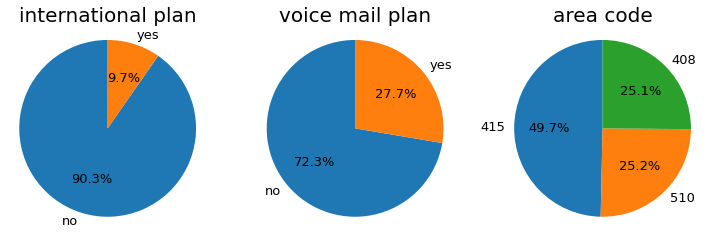

In [83]:
# круговая диаграмма для признака 'international plan' и 'voice mail plan'
plt.rcParams.update({'font.size': 13})
plt.subplots(figsize=(17, 17))
for i in range(2,5):
    plt.subplot(4, 4, i)
    plt.pie(df[cat_cols[i-1]].value_counts(), labels=df[cat_cols[i-1]].value_counts().index, autopct='%1.1f%%',
        shadow=False, startangle=90, radius=1.1)
    plt.title(cat_cols[i-1], fontdict={'fontsize':20})

Из круговых диаграмм видно:
- у 90% пользователей не подключен 'International plan'
- у 72% пользователей не подключен 'Voice mail plan'
- большая часть клиентов имеет area code 415

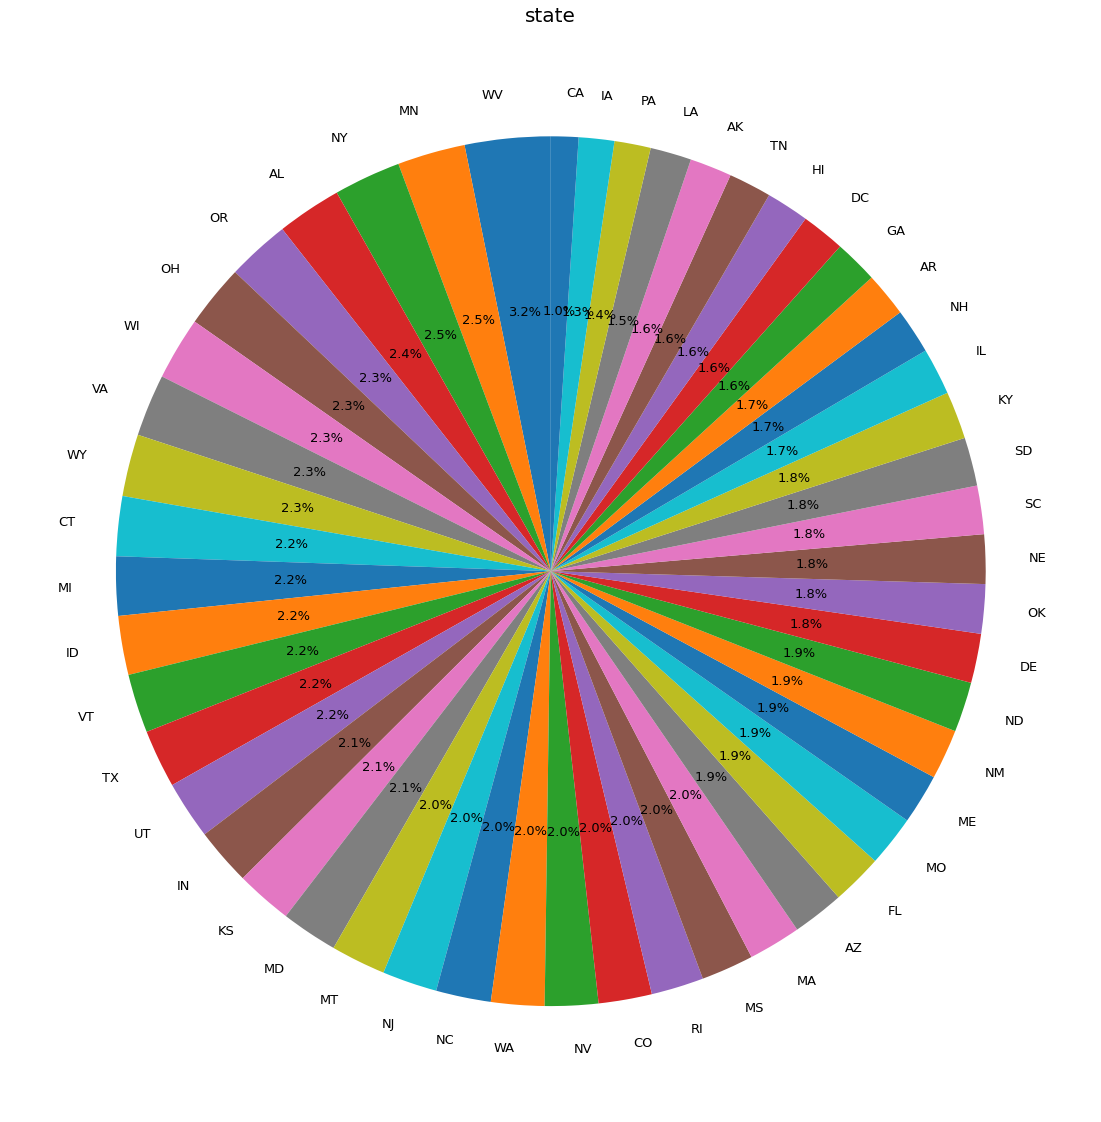

In [84]:
# круговая диаграмма для поля 'state'
plt.figure(figsize=(20,20))
plt.pie(df['state'].value_counts(), labels=df['state'].value_counts().index, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('state', fontdict={'fontsize':20})
None

- Согласно диаграмме на каждый штат приходится примерно одинаковое количество пользователей.

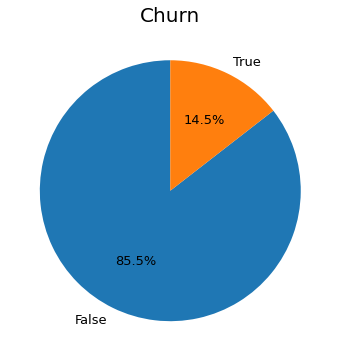

In [85]:
# круговая диаграмма для таргет-признака 'churn'
plt.figure(figsize=(6,6))
plt.pie(df['churn'].value_counts(), labels=df['churn'].value_counts().index, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Churn', fontdict={'fontsize':20})
None

Согласно диаграмме классы не являются сбалансированными;

In [86]:
# cоздадим сгруппированную таблицу для того, чтобы провести анализ в разрезе штатов
state=df.groupby('state', as_index=False).agg({'total day minutes':'sum', 'total day calls':'sum',\
                                               'total day charge':'sum',
                                         'total eve minutes':'sum', 'total eve calls':'sum',\
                                               'total eve charge':'sum',
                                         'total night minutes':'sum', 'total night calls':'sum',\
                                               'total night charge':'sum',
                                         'total intl minutes':'sum', 'total intl calls':'sum',\
                                               'total intl charge':'sum',
                                         'customer service calls':'sum',
                                         'phone number':'count'}).\
rename(columns={'phone number':'cnt_clients'})

In [87]:
# посмотрим на среднюю сумму, которую клиент принес компании в каждом штате за период: 

state['period LTV']=(state['total day charge']+state['total eve charge']\
                     +state['total night charge']+state['total intl charge'])\
/state.cnt_clients
state[['state','period LTV']].sort_values('period LTV', ascending=False).round(2).head()

,state,period LTV
15,IN,62.79
31,NJ,62.42
20,MD,62.08
16,KS,61.89
41,SD,61.26


In [88]:
# топ 5 штатов по количеству клиентов
state[['state', 'cnt_clients']].sort_values('cnt_clients', ascending=False).head()

,state,cnt_clients
49,WV,106
23,MN,84
34,NY,83
1,AL,80
37,OR,78


Как видно из таблицы: больше всего клиентов в штате WV

In [89]:
# посмотрим в каком штате клиенты звонят чаще всего (независимо от времени суток)
state['cnt_calls']=state['total day calls']+state['total eve calls']+state['total night calls']
state['cnt_calls_per_client']=state['cnt_calls']/state['cnt_clients']
state[['state', 'cnt_calls_per_client']].sort_values('cnt_calls_per_client', ascending=False).round(1).head()

,state,cnt_calls_per_client
10,GA,312.4
9,FL,310.3
28,ND,307.9
27,NC,307.2
15,IN,306.9


Больше всего звонков в расчете на одного клиента было совершено в GA

In [90]:
# посмотрим в каком штате совершается больше всего международных звонков
state['cnt_intl_calls_per_client']=state['total intl calls']/state['cnt_clients']
state[['state', 'cnt_intl_calls_per_client']].sort_values('cnt_intl_calls_per_client', ascending=False).head()

,state,cnt_intl_calls_per_client
50,WY,4.974026
28,ND,4.919355
3,AZ,4.859375
24,MO,4.857143
32,NM,4.838710


Больше всего международных звонков в расчете на одного клиента было совершено в WY

In [91]:
# посмотрим в каком штате клиенты чаще звонят в службу поддержки
state['service calls per client']=state['customer service calls']/state['cnt_clients']
state[['state', 'service calls per client']].sort_values('service calls per client', ascending=False).head()

,state,service calls per client
2,AR,1.981818
10,GA,1.925926
5,CO,1.787879
36,OK,1.786885
21,ME,1.741935


Чаще всего в сервисный центр звонят клиенты из AR

In [92]:
# распределение стоимости дневных тарифов
state['day_tariff']=state['total day charge']/state['total day minutes']
state[['state', 'day_tariff']].sort_values('day_tariff', ascending=False).head()

,state,day_tariff
24,MO,0.170007
12,IA,0.170006
21,ME,0.170006
14,IL,0.170006
37,OR,0.170006


Во всех штатах одинаковый дневной тариф за минуту звонка

In [93]:
# распределение стоимости вечерних тарифов
state['eve_tariff']=state['total eve charge']/state['total eve minutes']
state[['state', 'eve_tariff']].sort_values('eve_tariff', ascending=False).head()

,state,eve_tariff
36,OK,0.085005
4,CA,0.085005
7,DC,0.085005
45,VA,0.085004
27,NC,0.085003


Во всех штатах одинаковый вечерний тариф за минуту звонка

In [94]:
# распределение стоимости ночных тарифов
state['night_tariff']=state['total night charge']/state['total night minutes']
state[['state', 'night_tariff']].sort_values('night_tariff', ascending=False).head()

,state,night_tariff
12,IA,0.045005
38,PA,0.045004
5,CO,0.045003
34,NY,0.045003
19,MA,0.045003


Во всех штатах одинаковый ночной тариф за минуту звонка

In [95]:
# распределение стоимости международных тарифов
state['intl_tariff']=state['total intl charge']/state['total intl minutes']
state[['state', 'intl_tariff']].sort_values('intl_tariff', ascending=False).head()

,state,intl_tariff
36,OK,0.270142
4,CA,0.270134
8,DE,0.270131
32,NM,0.270119
21,ME,0.270110


Во всех штатах одинаковый тариф за минуту звонка

Стоимость тарифов:
- Самыми дорогими являются международные звонки: 0.27$ за минуту   

- Следом идут дневные звонки: 0.17$ за минуту   

- Далее вечерние звонки: 0.08$ за минуту

- Дешевле всего обходятся ночные звонки: 0.04$ за минуту

### Подготовим данные для обучения

In [276]:
feature_cols_set = [x for x in feature_cols if x not in ['total day charge',
                                                         'total eve charge',
                                                         'total night charge',
                                                         'total intl charge']]

In [277]:
# запишем в X- признаки, а в y- таргет
X=df[feature_cols_set]
y=df[target_col]

Заменим категориальные переменные 

In [278]:
# Заменим international plan
X['international plan'] = np.where(X['international plan'] == 'yes', 1.0, X['international plan'])
X['international plan'] = np.where(X['international plan'] == 'no', 0.0, X['international plan'])
X['international plan']=pd.to_numeric(X['international plan'], errors='coerce')

<ipython-input-278-5d72e25c8972>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['international plan'] = np.where(X['international plan'] == 'yes', 1.0, X['international plan'])
<ipython-input-278-5d72e25c8972>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['international plan'] = np.where(X['international plan'] == 'no', 0.0, X['international plan'])
<ipython-input-278-5d72e25c8972>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [279]:
# Заменим voice mail plan
X['voice mail plan'] = np.where(X['voice mail plan'] == 'yes', 1.0, X['voice mail plan'])
X['voice mail plan'] = np.where(X['voice mail plan'] == 'no', 0.0, X['voice mail plan'])
X['voice mail plan']=pd.to_numeric(X['voice mail plan'], errors='coerce')

<ipython-input-279-16f8a629f066>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['voice mail plan'] = np.where(X['voice mail plan'] == 'yes', 1.0, X['voice mail plan'])
<ipython-input-279-16f8a629f066>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['voice mail plan'] = np.where(X['voice mail plan'] == 'no', 0.0, X['voice mail plan'])
<ipython-input-279-16f8a629f066>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [280]:
#заменим значения целевой переменной на числовые
y=pd.to_numeric(y)

In [281]:
# закодируем оставшиеся категориальные переменные 'state' - 51 значение, 'area code' - 3 значения, вызвав функцию get_dummies
X=pd.get_dummies(X, drop_first=True)

In [282]:
X.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,0,0,0,0,0,1,0
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,0,0,0,0,0,1,0
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,0,0,0,0,0,1,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,0,0,0,0,1,0


#### Логистическая регрессия

In [283]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [284]:
# Разделим выборку на обучающую и валидационную часть
X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [285]:
# Стандартизирую признаки
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_valid_std=stdsc.transform(X_valid)

In [286]:
# Обучим
log_reg_all=LogisticRegressionCV(scoring='roc_auc', refit=True, Cs=[100, 100, 1, 0.1, 0.01, 0.001], max_iter=100)
log_reg_all.fit(X_train_std, y_train)

LogisticRegressionCV(Cs=[100, 100, 1, 0.1, 0.01, 0.001], scoring='roc_auc')

In [287]:
# Получим предсказания нашей модели для ранее не встречающихся данных
y_pred=log_reg_all.predict_proba(X_valid_std)

In [288]:
# Посмотрим на roc_auc_score для ранее не встречавшихся данных
Log_reg_res=roc_auc_score(y_valid, y_pred[:, 1])
Log_reg_res

0.7968300060496067

In [289]:
# Оптимальный параметр регуляризации
log_reg_all.C_

array([0.01])

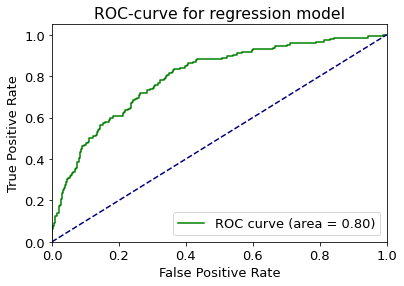

In [290]:
# Построю Roc-curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, y_pred[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green',label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve for regression model')
plt.legend(loc="lower right")

In [291]:
print( 'ROC-AUC при валидации составил %.1f с параметром регуляризации C = %.2f'\
      % (Log_reg_res,log_reg_all.C_))

ROC-AUC при валидации составил 0.8 с параметром регуляризации C = 0.01


#### Decision tree

In [292]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [293]:
clf=tree.DecisionTreeClassifier()

In [294]:
# параметры, которые хотим потюнить
parameters={'criterion':['gini', 'entropy'], 'max_depth':range(1,30), \
            'min_samples_leaf':[1,3,5,7]}

In [295]:
grid_search_cv_clf= GridSearchCV(clf,parameters, cv=5)

In [296]:
# обучаемся для каждого параметра
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': [1, 3, 5, 7]})

In [297]:
# лучшие параметры на кросс-валидационном мн-ве
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

In [298]:
best_clf_tree=grid_search_cv_clf.best_estimator_

In [299]:
y_pred_tree=best_clf_tree.predict_proba(X_valid)

In [300]:
roc_auc_tree=roc_auc_score(y_valid, y_pred_tree[:, 1])

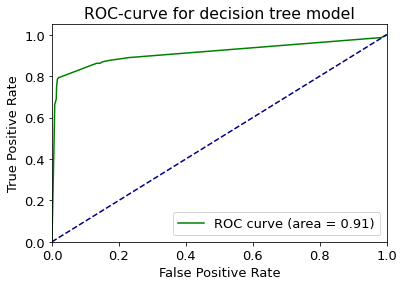

In [301]:
# Построю Roc-curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_tree[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green',label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve for decision tree model')
plt.legend(loc="lower right")

In [302]:
print( 'ROC-AUC при валидации составил %.2f '\
      % (roc_auc_tree))

ROC-AUC при валидации составил 0.91 


#### Random Forest clf

In [303]:
from sklearn.ensemble import RandomForestClassifier

In [304]:
clf_rf=RandomForestClassifier()

In [305]:
parameters_rf={'n_estimators':[50,100,200], 'max_depth':[2,5,7,10],}

In [306]:
grid_search_cv_clf=GridSearchCV(clf_rf, parameters_rf, cv=5 )

In [307]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 200]})

In [308]:
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [309]:
best_clf_rf=grid_search_cv_clf.best_estimator_

In [310]:
y_pred_rf=best_clf_rf.predict_proba(X_valid)

In [311]:
roc_auc_rf=roc_auc_score(y_valid, y_pred_rf[:, 1])

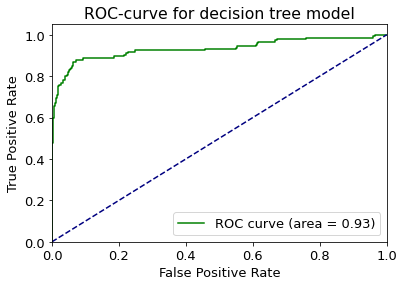

In [312]:
# Построю Roc-curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_rf[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green',label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve for decision tree model')
plt.legend(loc="lower right")

In [313]:
print( 'ROC-AUC при валидации составил %.2f '\
      % (roc_auc_rf))

ROC-AUC при валидации составил 0.93 


Посмотрим на рейтинг признаков по результатам Random Forest:

In [314]:
feature_importances_rf=best_clf_rf.feature_importances_

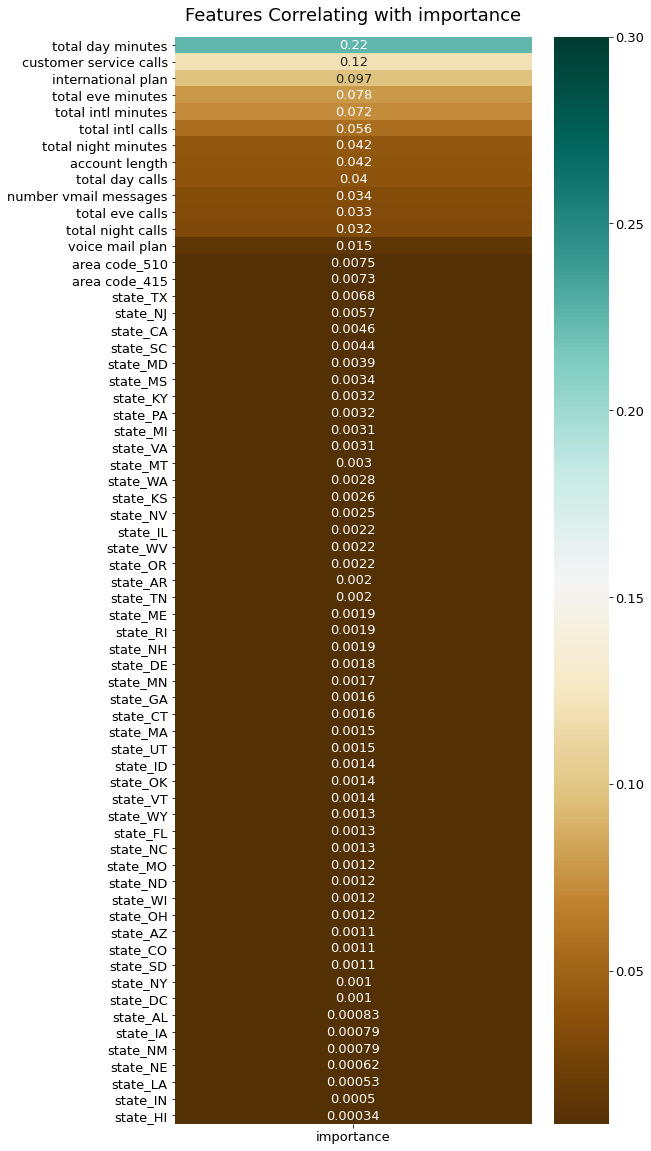

In [360]:
plt.figure(figsize=(8, 20))
imp = pd.DataFrame(feature_importances_rf, index=X.columns, columns=['importance'])
heatmap = sns.heatmap(imp.sort_values(by='importance', ascending=False), vmin=0.009, vmax=0.3, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with importance', fontdict={'fontsize':18}, pad=16);

#### Алгоритм KNN

In [316]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [317]:
clf_knn = KNN()

In [319]:
parameters_knn={'n_neighbors':[5,10,20], 'leaf_size':[10,30,50]}

In [322]:
grid_search_cv_clf=GridSearchCV(clf_knn, parameters_knn, cv=5 )

In [324]:
grid_search_cv_clf.fit(X_train_std,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 30, 50], 'n_neighbors': [5, 10, 20]})

In [331]:
grid_search_cv_clf.best_params_

{'leaf_size': 10, 'n_neighbors': 10}

In [333]:
best_clf_knn=grid_search_cv_clf.best_estimator_

In [334]:
# Получим предсказания нашей модели для ранее не встречающихся данных
y_pred_knn=best_clf_knn.predict_proba(X_valid_std)

In [335]:
roc_auc_knn=roc_auc_score(y_valid, y_pred_knn[:, 1])

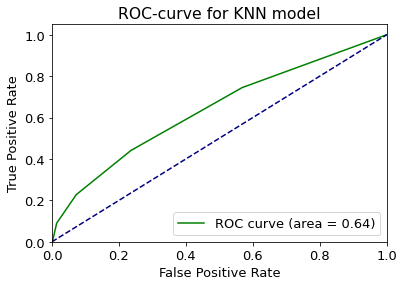

In [336]:
# Построю Roc-curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_knn[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green',label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve for KNN model')
plt.legend(loc="lower right")

In [337]:
print( 'ROC-AUC при валидации составил %.2f '\
      % (roc_auc_knn))

ROC-AUC при валидации составил 0.64 


#### Градиентный бустинг

In [199]:
from catboost import CatBoostClassifier

In [361]:
# Возьму все признаки
X=df[num_cols+cat_cols]
y=df[target_col]

In [362]:
# Разделим выборку на обучающую и валидационную часть
X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [363]:
# Применим дефолтный CatBoostClassifier
clf_cb=CatBoostClassifier(cat_features=cat_cols)
clf_cb.fit(X_train, y_train)

Learning rate set to 0.014792
0:	learn: 0.6823495	total: 3.38ms	remaining: 3.37s
1:	learn: 0.6667626	total: 12.1ms	remaining: 6.03s
2:	learn: 0.6582402	total: 15.2ms	remaining: 5.04s
3:	learn: 0.6461683	total: 22.6ms	remaining: 5.63s
4:	learn: 0.6348162	total: 29.9ms	remaining: 5.96s
5:	learn: 0.6252026	total: 35.5ms	remaining: 5.88s
6:	learn: 0.6099477	total: 40.5ms	remaining: 5.75s
7:	learn: 0.5992623	total: 45.2ms	remaining: 5.61s
8:	learn: 0.5885953	total: 48.8ms	remaining: 5.37s
9:	learn: 0.5773174	total: 53.3ms	remaining: 5.27s
10:	learn: 0.5662059	total: 57.4ms	remaining: 5.16s
11:	learn: 0.5574195	total: 61.6ms	remaining: 5.07s
12:	learn: 0.5496769	total: 63.5ms	remaining: 4.82s
13:	learn: 0.5401044	total: 66.8ms	remaining: 4.7s
14:	learn: 0.5336750	total: 68.8ms	remaining: 4.52s
15:	learn: 0.5238160	total: 73ms	remaining: 4.49s
16:	learn: 0.5151414	total: 75.9ms	remaining: 4.39s
17:	learn: 0.5063126	total: 79.5ms	remaining: 4.34s
18:	learn: 0.4963161	total: 82.4ms	remaining: 4

169:	learn: 0.1853691	total: 569ms	remaining: 2.78s
170:	learn: 0.1850475	total: 573ms	remaining: 2.78s
171:	learn: 0.1844560	total: 578ms	remaining: 2.78s
172:	learn: 0.1842286	total: 582ms	remaining: 2.78s
173:	learn: 0.1839762	total: 586ms	remaining: 2.78s
174:	learn: 0.1835659	total: 589ms	remaining: 2.77s
175:	learn: 0.1830978	total: 592ms	remaining: 2.77s
176:	learn: 0.1826055	total: 595ms	remaining: 2.77s
177:	learn: 0.1821137	total: 598ms	remaining: 2.76s
178:	learn: 0.1817534	total: 602ms	remaining: 2.76s
179:	learn: 0.1815294	total: 606ms	remaining: 2.76s
180:	learn: 0.1809624	total: 609ms	remaining: 2.75s
181:	learn: 0.1804672	total: 613ms	remaining: 2.75s
182:	learn: 0.1799952	total: 615ms	remaining: 2.75s
183:	learn: 0.1795384	total: 619ms	remaining: 2.75s
184:	learn: 0.1791933	total: 622ms	remaining: 2.74s
185:	learn: 0.1786774	total: 626ms	remaining: 2.74s
186:	learn: 0.1782676	total: 629ms	remaining: 2.73s
187:	learn: 0.1780822	total: 632ms	remaining: 2.73s
188:	learn: 

345:	learn: 0.1420723	total: 1.14s	remaining: 2.15s
346:	learn: 0.1419021	total: 1.14s	remaining: 2.15s
347:	learn: 0.1418510	total: 1.15s	remaining: 2.15s
348:	learn: 0.1418480	total: 1.15s	remaining: 2.14s
349:	learn: 0.1416690	total: 1.15s	remaining: 2.14s
350:	learn: 0.1414797	total: 1.16s	remaining: 2.14s
351:	learn: 0.1414171	total: 1.16s	remaining: 2.14s
352:	learn: 0.1412307	total: 1.17s	remaining: 2.13s
353:	learn: 0.1410943	total: 1.17s	remaining: 2.13s
354:	learn: 0.1409635	total: 1.17s	remaining: 2.13s
355:	learn: 0.1408750	total: 1.18s	remaining: 2.13s
356:	learn: 0.1407322	total: 1.18s	remaining: 2.13s
357:	learn: 0.1407293	total: 1.18s	remaining: 2.12s
358:	learn: 0.1406972	total: 1.19s	remaining: 2.12s
359:	learn: 0.1405651	total: 1.19s	remaining: 2.12s
360:	learn: 0.1403624	total: 1.2s	remaining: 2.12s
361:	learn: 0.1403358	total: 1.2s	remaining: 2.12s
362:	learn: 0.1401542	total: 1.21s	remaining: 2.12s
363:	learn: 0.1400145	total: 1.21s	remaining: 2.11s
364:	learn: 0.

521:	learn: 0.1220024	total: 1.91s	remaining: 1.75s
522:	learn: 0.1219490	total: 1.92s	remaining: 1.75s
523:	learn: 0.1218367	total: 1.92s	remaining: 1.75s
524:	learn: 0.1216931	total: 1.93s	remaining: 1.74s
525:	learn: 0.1216149	total: 1.93s	remaining: 1.74s
526:	learn: 0.1215235	total: 1.93s	remaining: 1.74s
527:	learn: 0.1214708	total: 1.94s	remaining: 1.73s
528:	learn: 0.1212864	total: 1.94s	remaining: 1.73s
529:	learn: 0.1211802	total: 1.95s	remaining: 1.73s
530:	learn: 0.1210105	total: 1.95s	remaining: 1.72s
531:	learn: 0.1209858	total: 1.96s	remaining: 1.72s
532:	learn: 0.1208507	total: 1.96s	remaining: 1.72s
533:	learn: 0.1207461	total: 1.97s	remaining: 1.71s
534:	learn: 0.1206251	total: 1.97s	remaining: 1.71s
535:	learn: 0.1204441	total: 1.97s	remaining: 1.71s
536:	learn: 0.1202894	total: 1.98s	remaining: 1.71s
537:	learn: 0.1202173	total: 1.98s	remaining: 1.7s
538:	learn: 0.1201103	total: 1.99s	remaining: 1.7s
539:	learn: 0.1200994	total: 1.99s	remaining: 1.7s
540:	learn: 0.1

714:	learn: 0.1026553	total: 2.68s	remaining: 1.07s
715:	learn: 0.1026055	total: 2.68s	remaining: 1.06s
716:	learn: 0.1025462	total: 2.69s	remaining: 1.06s
717:	learn: 0.1024870	total: 2.69s	remaining: 1.06s
718:	learn: 0.1023203	total: 2.7s	remaining: 1.05s
719:	learn: 0.1022844	total: 2.7s	remaining: 1.05s
720:	learn: 0.1022081	total: 2.71s	remaining: 1.05s
721:	learn: 0.1021830	total: 2.71s	remaining: 1.04s
722:	learn: 0.1020178	total: 2.72s	remaining: 1.04s
723:	learn: 0.1019134	total: 2.72s	remaining: 1.04s
724:	learn: 0.1018806	total: 2.73s	remaining: 1.03s
725:	learn: 0.1017415	total: 2.73s	remaining: 1.03s
726:	learn: 0.1016790	total: 2.74s	remaining: 1.03s
727:	learn: 0.1016106	total: 2.74s	remaining: 1.02s
728:	learn: 0.1015049	total: 2.75s	remaining: 1.02s
729:	learn: 0.1014476	total: 2.75s	remaining: 1.02s
730:	learn: 0.1013984	total: 2.75s	remaining: 1.01s
731:	learn: 0.1012725	total: 2.76s	remaining: 1.01s
732:	learn: 0.1012589	total: 2.77s	remaining: 1.01s
733:	learn: 0.

880:	learn: 0.0879268	total: 3.45s	remaining: 467ms
881:	learn: 0.0877760	total: 3.46s	remaining: 463ms
882:	learn: 0.0877505	total: 3.46s	remaining: 459ms
883:	learn: 0.0877426	total: 3.47s	remaining: 455ms
884:	learn: 0.0876760	total: 3.47s	remaining: 451ms
885:	learn: 0.0875739	total: 3.48s	remaining: 448ms
886:	learn: 0.0874533	total: 3.48s	remaining: 444ms
887:	learn: 0.0873586	total: 3.49s	remaining: 440ms
888:	learn: 0.0872545	total: 3.49s	remaining: 436ms
889:	learn: 0.0871776	total: 3.5s	remaining: 432ms
890:	learn: 0.0870589	total: 3.5s	remaining: 428ms
891:	learn: 0.0870501	total: 3.5s	remaining: 424ms
892:	learn: 0.0870199	total: 3.51s	remaining: 420ms
893:	learn: 0.0869998	total: 3.51s	remaining: 416ms
894:	learn: 0.0869269	total: 3.52s	remaining: 412ms
895:	learn: 0.0868094	total: 3.52s	remaining: 409ms
896:	learn: 0.0867714	total: 3.52s	remaining: 405ms
897:	learn: 0.0866649	total: 3.53s	remaining: 401ms
898:	learn: 0.0865757	total: 3.53s	remaining: 397ms
899:	learn: 0.0

In [364]:
# Посмотрим на получившееся качество
catboost_res=roc_auc_score(y_valid, clf_cb.predict_proba(X_valid)[:, 1])


In [365]:
print( 'ROC-AUC при валидации составил %.2f '\
      % (Catboost_res))

ROC-AUC при валидации составил 0.95 


<AxesSubplot:>

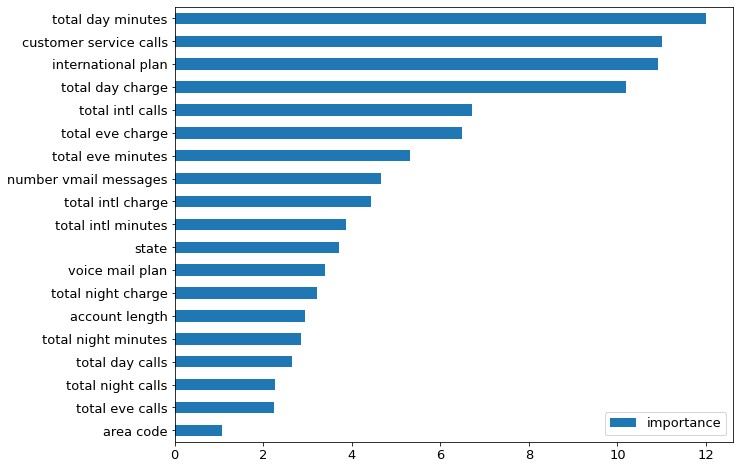

In [366]:
imp = pd.DataFrame(clf_cb.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(10, 8))

Text(0, 0.5, 'Count of people')

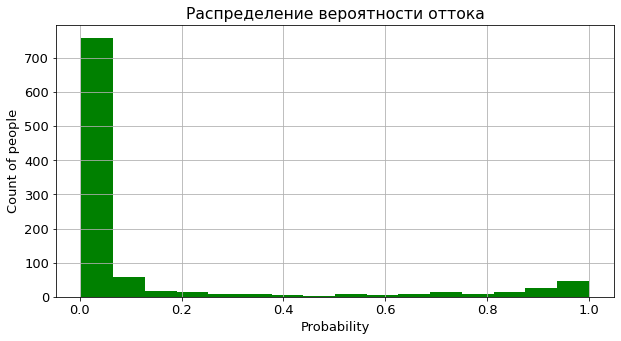

In [210]:
# построим гистограмму распределения вероятности оттока
pd.Series(clf_cb.predict_proba(X_valid)[:, 1]).hist(figsize=(10,5), color='green', bins=16)
plt.title('Распределение вероятности оттока')
plt.xlabel('Probability')
plt.ylabel('Count of people')

Вывод score по всем моделям:
- Catboost 0.95
- Random forest 0.93
- Desicion tree 0.91
- Logistic Regression whole features 0.8
- KNN 0.64

### Выводы:
- Топ-3 штата по количеству ушедших клиентов Нью-Джерси, Техас, Мэриленд;
- 90% клиентов не подключают 'International plan';
- 72% клиентов не подключают 'Voice mail plan';
- Total charge и total minutes имеют прямую корреляцию;
- В датасете больше всего клиентов из Западной Вирджинии;
- Чаще всего в сервисный центр звонят жители Арканзаса;
- Больше всего международных звонков совершено из Вайоминга;
- Тарифы за минуту разговора у всех штатов одинаковые; 
- Самый дорогой тариф на международные разговоры; 
- Минимальная стоимость тарифа на ночные разговоры;
- Наилучшее качество модели получилось на Random forest и Catboost (0.95 и 0.93 соответственно);
- Наибольшее влияние в модели Catboost оказали  total day charge, customer service calls, international plan, total day minutes;
- В конечном итоге я бы выбрала бэггинговую модель Random forest, тк она отлично интерпретируется.